# Localized Weather Forecasting using ANN and Back Propagation

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [3]:
# Data source: https://power.larc.nasa.gov/data-access-viewer/
df = pd.read_csv('NewSl.csv')

In [4]:
df.head()

,Date,Month,Year,RF,T max,T min,Avg_tem
0,1,10,2013,0.0,31.1,25.8,28.45
1,2,10,2013,0.0,31.3,27.5,29.40
2,3,10,2013,1.6,31.3,27.3,29.30
3,4,10,2013,5.8,30.7,25.7,28.20
4,5,10,2013,0.3,30.8,24.4,27.60


# Data Preprocessing

In [5]:
df['Year'] = df.Year.astype(str)
df['Month'] = df.Month.astype(str)
df['Date'] = df.Date.astype(str)

df['date'] = df['Year'].str.cat(df['Month'], sep = '/')
df['DATE'] = df['date'].str.cat(df['Date'], sep = '/')
df.head()

,Date,Month,Year,RF,T max,T min,Avg_tem,date,DATE
0,1,10,2013,0.0,31.1,25.8,28.45,2013/10,2013/10/1
1,2,10,2013,0.0,31.3,27.5,29.40,2013/10,2013/10/2
2,3,10,2013,1.6,31.3,27.3,29.30,2013/10,2013/10/3
3,4,10,2013,5.8,30.7,25.7,28.20,2013/10,2013/10/4
4,5,10,2013,0.3,30.8,24.4,27.60,2013/10,2013/10/5


In [6]:
df.drop(columns=['Year','Month','Date','date'],axis=1,inplace=True)
df.head()

,RF,T max,T min,Avg_tem,DATE
0,0.0,31.1,25.8,28.45,2013/10/1
1,0.0,31.3,27.5,29.40,2013/10/2
2,1.6,31.3,27.3,29.30,2013/10/3
3,5.8,30.7,25.7,28.20,2013/10/4
4,0.3,30.8,24.4,27.60,2013/10/5


In [7]:
df.set_index(['DATE'], inplace = True)
df.head()

,RF,T max,T min,Avg_tem
DATE,,,,
2013/10/1,0.0,31.1,25.8,28.45
2013/10/2,0.0,31.3,27.5,29.40
2013/10/3,1.6,31.3,27.3,29.30
2013/10/4,5.8,30.7,25.7,28.20
2013/10/5,0.3,30.8,24.4,27.60


In [8]:
df.dtypes

RF         float64
T max      float64
T min      float64
Avg_tem    float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3652 entries, 2013/10/1 to 2023/9/30
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RF       3652 non-null   float64
 1   T max    3652 non-null   float64
 2   T min    3652 non-null   float64
 3   Avg_tem  3652 non-null   float64
dtypes: float64(4)
memory usage: 142.7+ KB


In [10]:
df.shape

(3652, 4)

In [11]:
df.isnull().any()

RF         False
T max      False
T min      False
Avg_tem    False
dtype: bool

In [12]:
df.tail()

,RF,T max,T min,Avg_tem
DATE,,,,
2023/9/26,18.4,31.3,26.4,28.85
2023/9/27,42.4,29.8,25.2,27.50
2023/9/28,63.4,28.7,24.6,26.65
2023/9/29,60.3,29.8,23.8,26.80
2023/9/30,29.6,30.4,23.5,26.95


In [13]:
df.describe()

,RF,T max,T min,Avg_tem
count,3652.000000,3652.000000,3652.000000,3652.000000
mean,6.942223,31.211090,25.251177,28.231134
std,16.468035,1.255083,1.514078,1.026992
min,0.000000,25.200000,19.800000,24.050000
25%,0.000000,30.500000,24.200000,27.550000
50%,0.100000,31.200000,25.100000,28.250000
75%,5.500000,32.000000,26.400000,29.000000
max,256.900000,35.900000,29.400000,31.300000


In [14]:
# Scaling the data - Normalize (0-1) or Standardize (gaussian data)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
print('Scaled df:\n', df_scaled, '\n', df_scaled.shape)

Scaled df:
 [[0.         0.55140187 0.625      0.60689655]
 [0.         0.57009346 0.80208333 0.73793103]
 [0.0062281  0.57009346 0.78125    0.72413793]
 ...
 [0.24678863 0.3271028  0.5        0.35862069]
 [0.23472168 0.42990654 0.41666667 0.37931034]
 [0.11521993 0.48598131 0.38541667 0.4       ]] 
 (3652, 4)


In [15]:
# Splitting the dataset

# Train - Test
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_scaled, test_size = 0.1425, shuffle = False)
# train = df.loc[:'2018/12/31',:]
# test = df.loc['2019/1/1':,:]

# X - Y
x_train, y_train, x_test, y_test = [], [], [], []
for i in range (1, len(train)):
    x_train.append(train[i-1])
    y_train.append(train[i])
for i in range (1, len(test)):
    x_test.append(test[i-1])
    y_test.append(test[i])

In [16]:
pd.DataFrame(x_train)

,0,1,2,3
0,0.000000,0.551402,0.625000,0.606897
1,0.000000,0.570093,0.802083,0.737931
2,0.006228,0.570093,0.781250,0.724138
3,0.022577,0.514019,0.614583,0.572414
4,0.001168,0.523364,0.479167,0.489655
...,...,...,...,...
3125,0.042040,0.644860,0.760417,0.765517
3126,0.000389,0.579439,0.531250,0.565517
3127,0.000000,0.644860,0.604167,0.662069
3128,0.017127,0.598131,0.604167,0.627586


In [17]:
pd.DataFrame(y_train)

,0,1,2,3
0,0.000000,0.570093,0.802083,0.737931
1,0.006228,0.570093,0.781250,0.724138
2,0.022577,0.514019,0.614583,0.572414
3,0.001168,0.523364,0.479167,0.489655
4,0.009731,0.542056,0.552083,0.551724
...,...,...,...,...
3125,0.000389,0.579439,0.531250,0.565517
3126,0.000000,0.644860,0.604167,0.662069
3127,0.017127,0.598131,0.604167,0.627586
3128,0.000000,0.644860,0.666667,0.703448


In [18]:
# Converting list to array
x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3130, 4), (3130, 4), (520, 4), (520, 4))

# Building the Model

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import Dropout

In [20]:
#define model
model = Sequential()
model.add(Dense(20, input_dim = 4, activation = 'relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4))

model.summary()

#compile  model
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 4)                 84        
                                                                 
Total params: 604 (2.36 KB)
Trainable params: 604 (2.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



In [21]:
# Fit the model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 15, shuffle = False)

Epoch 1/100


209/209 [==============================] - 1s 2ms/step - loss: 0.0582 - accuracy: 0.3719 - val_loss: 0.0100 - val_accuracy: 0.6481
Epoch 2/100
209/209 [==============================] - 0s 1ms/step - loss: 0.0099 - accuracy: 0.4345 - val_loss: 0.0087 - val_accuracy: 0.6654
Epoch 3/100
209/209 [==============================] - 0s 1ms/step - loss: 0.0090 - accuracy: 0.5572 - val_loss: 0.0079 - val_accuracy: 0.7000
Epoch 4/100
209/209 [==============================] - 0s 1ms/step - loss: 0.0085 - accuracy: 0.6089 - val_loss: 0.0075 - val_accuracy: 0.7346
Epoch 5/100
209/209 [==============================] - 0s 1ms/step - loss: 0.0082 - accuracy: 0.6409 - val_loss: 0.0073 - val_accuracy: 0.7558
Epoch 6/100
209/209 [==============================] - 0s 1ms/step - loss: 0.0081 - accuracy: 0.6569 - val_loss: 0.0072 - val_accuracy: 0.7654
Epoch 7/100
209/209 [==============================] - 0s 1ms/step - loss: 0.0080 - accuracy: 0.6649 - val_loss: 0.0071 - val_accuracy: 0.75

Epoch 55/100
209/209 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 0.6831 - val_loss: 0.0065 - val_accuracy: 0.7519
Epoch 56/100
209/209 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 0.6847 - val_loss: 0.0065 - val_accuracy: 0.7519
Epoch 57/100
209/209 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 0.6847 - val_loss: 0.0065 - val_accuracy: 0.7519
Epoch 58/100
209/209 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 0.6840 - val_loss: 0.0065 - val_accuracy: 0.7538
Epoch 59/100
209/209 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 0.6850 - val_loss: 0.0065 - val_accuracy: 0.7519
Epoch 60/100
209/209 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 0.6875 - val_loss: 0.0065 - val_accuracy: 0.7500
Epoch 61/100
209/209 [==============================] - 0s 1ms/step - loss: 0.0073 - accuracy: 0.6879 - val_loss: 0.0065 - val_accuracy:

In [22]:
# Saving model architecture and weights to a single file
model.save("model.h5")
print("Model Saved to disk")
model = load_model("model.h5")
model.summary()

Model Saved to disk
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                100       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 4)                 84        
                                                                 
Total params: 604 (2.36 KB)
Trainable params: 604 (2.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


C:\Users\Sevindu\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)
actual_y_pred = scaler.inverse_transform(y_test)

17/17 [==============================] - 0s 1ms/step


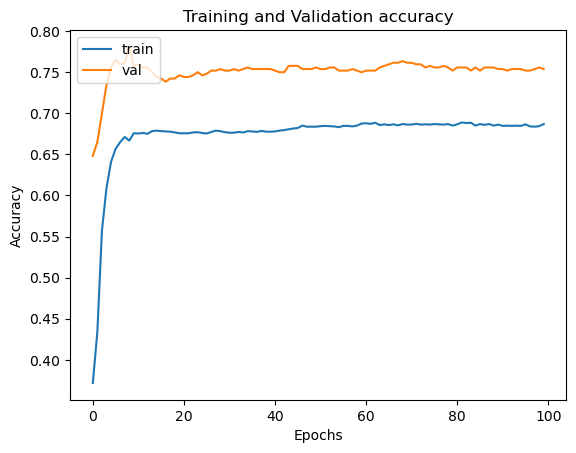

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
print('Actual values:')
print('       RF T_min T_max Avg_tem')
print(pd.DataFrame(actual_y_pred))

print('Predicted values:')
print('         RF       T_min      T_max     Avg_tem')
print(pd.DataFrame(y_pred))

Actual values:
       RF T_min T_max Avg_tem
        0     1     2      3
0    13.3  32.1  24.9  28.50
1    12.6  32.7  26.2  29.45
2     3.5  31.3  27.1  29.20
3     0.4  32.4  27.6  30.00
4     0.0  32.5  29.1  30.80
..    ...   ...   ...    ...
515  18.4  31.3  26.4  28.85
516  42.4  29.8  25.2  27.50
517  63.4  28.7  24.6  26.65
518  60.3  29.8  23.8  26.80
519  29.6  30.4  23.5  26.95

[520 rows x 4 columns]
Predicted values:
         RF       T_min      T_max     Avg_tem
             0          1          2          3
0     3.465528  32.356873  25.204365  28.834021
1    11.612445  31.529150  24.647310  28.031567
2    12.592079  31.851334  25.324068  28.620066
3     8.064625  30.913883  26.497097  28.733603
4     2.111162  32.116348  27.332563  29.755142
..         ...        ...        ...        ...
515   9.585368  30.799601  25.603542  28.237043
516  11.609744  30.519444  25.011427  27.851252
517  15.045736  29.565380  24.030121  26.776497
518  17.388861  29.448666  23.793890  

In [26]:
# Evaluating the model
scores = model.evaluate(actual_y_pred, y_pred, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 18.85%


In [27]:
# Create KFold cross-validation object
from sklearn.model_selection import KFold
cv = KFold(n_splits=10, shuffle=False)

# Iterate through CV splits
results = []
for tr, tt in cv.split(x_train, y_train):
    # Fit the model on training data
    model.fit(x_train[tr], y_train[tr])
    
    # Generate predictions on the test data and collect
    prediction = model.predict(x_train[tt])
    results.append((prediction, tt))

10/10 [==============================] - 0s 1ms/step


In [28]:
pd.DataFrame(results)

,0,1
0,"[[0.028085701, 0.564168, 0.6544927, 0.6340051]...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,"[[0.038156822, 0.47025827, 0.55083925, 0.50437...","[313, 314, 315, 316, 317, 318, 319, 320, 321, ..."
2,"[[0.04210553, 0.60055286, 0.50917614, 0.561598...","[626, 627, 628, 629, 630, 631, 632, 633, 634, ..."
3,"[[0.018226601, 0.7584531, 0.6239848, 0.7591238...","[939, 940, 941, 942, 943, 944, 945, 946, 947, ..."
4,"[[0.018853111, 0.57654995, 0.65286297, 0.64386...","[1252, 1253, 1254, 1255, 1256, 1257, 1258, 125..."
5,"[[0.038286045, 0.5160763, 0.4245293, 0.4421969...","[1565, 1566, 1567, 1568, 1569, 1570, 1571, 157..."
6,"[[0.027470933, 0.5792895, 0.5187142, 0.5549779...","[1878, 1879, 1880, 1881, 1882, 1883, 1884, 188..."
7,"[[0.027987119, 0.5073483, 0.38956055, 0.424723...","[2191, 2192, 2193, 2194, 2195, 2196, 2197, 219..."
8,"[[0.010335725, 0.471875, 0.66101253, 0.5724637...","[2504, 2505, 2506, 2507, 2508, 2509, 2510, 251..."
9,"[[0.015565135, 0.5687927, 0.7116994, 0.679873]...","[2817, 2818, 2819, 2820, 2821, 2822, 2823, 282..."


# Making prediction on input data

In [29]:
input_data = []

print('Enter the weather parameters of previous day: ')
print('Rain Fall , MIN temp , MAX temp , Avg temp ' )
for i in range(0,4):
    input_data.append(float(input()))

input_data = np.array(input_data) 
input_data.shape = (1,4)
#a=pd.DataFrame(a)
print('Input Data: ', input_data)
input_data = scaler.transform(input_data)
print('Scaled Input Data:', input_data)

pred1 = model.predict(input_data)
pred2 = scaler.inverse_transform(pred1)
print('Predicted Data: ')
pd.DataFrame(pred2)

Enter the weather parameters of previous day: 
Rain Fall , MIN temp , MAX temp , Avg temp 
3
26
27
26
Input Data:  [[ 3. 26. 27. 26.]]
Scaled Input Data: [[0.0116777  0.07476636 0.75       0.26896552]]
1/1 [==============================] - 0s 16ms/step
Predicted Data: 


C:\Users\Sevindu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,0,1,2,3
0,4.962538,29.774172,25.303045,27.407784


In [30]:
pd.DataFrame(scaler.inverse_transform(x_test))

,0,1,2,3
0,0.5,32.5,25.0,28.75
1,13.3,32.1,24.9,28.50
2,12.6,32.7,26.2,29.45
3,3.5,31.3,27.1,29.20
4,0.4,32.4,27.6,30.00
...,...,...,...,...
515,4.6,31.1,26.1,28.60
516,18.4,31.3,26.4,28.85
517,42.4,29.8,25.2,27.50
518,63.4,28.7,24.6,26.65


In [32]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle=False)

results = []
for tr, tt in cv.split(x_train, y_train):
    # Fit the model on training data
    model.fit(x_train[tr], y_train[tr])
    
    # Evaluate on the validation set
    validation_loss, validation_accuracy = model.evaluate(x_train[tt], y_train[tt])
    
    results.append(validation_accuracy)

# Print the mean and standard deviation of validation accuracies
print(f'Mean Validation Accuracy: {np.mean(results)}')
print(f'Standard Deviation of Validation Accuracy: {np.std(results)}')


10/10 [==============================] - 0s 1000us/step - loss: 0.0070 - accuracy: 0.7061
Mean Validation Accuracy: 0.6977635800838471
Standard Deviation of Validation Accuracy: 0.04036701103761362


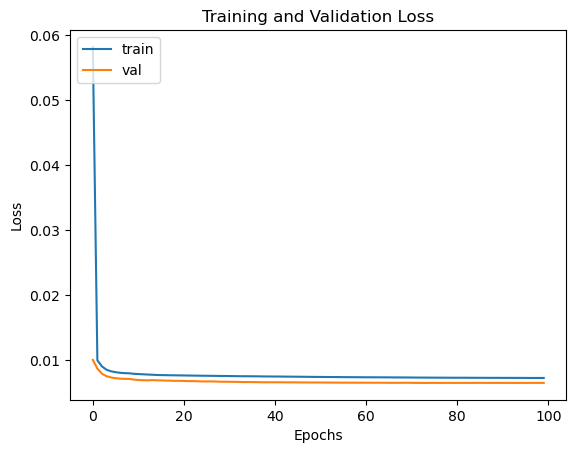

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#If the training loss is decreasing but the validation loss starts increasing or remains stagnant, it may indicate overfitting

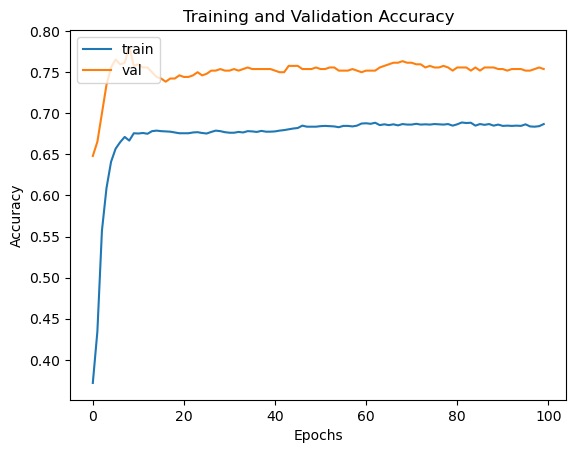

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#If the training accuracy continues to improve while the validation accuracy plateaus or decreases, it suggests overfitting

In [39]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


17/17 [==============================] - 0s 876us/step - loss: 0.0065 - accuracy: 0.7481
Test Loss: 0.006541518494486809, Test Accuracy: 0.7480769157409668


In [40]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, shuffle=False)

results = []
for tr, tt in cv.split(x_train, y_train):
    # Fit the model on training data
    model.fit(x_train[tr], y_train[tr])
    
    # Evaluate on the training set
    training_loss, training_accuracy = model.evaluate(x_train[tr], y_train[tr])
    
    # Evaluate on the validation set
    validation_loss, validation_accuracy = model.evaluate(x_train[tt], y_train[tt])
    
    results.append((training_accuracy, validation_accuracy))

# Print the training and validation metrics for each fold
for i, (train_metric, val_metric) in enumerate(results):
    print(f'Fold {i + 1}: Training Accuracy - {train_metric}, Validation Accuracy - {val_metric}')

    
#Examine the training and validation metrics for each fold. If the training performance is consistently higher than the validation performance, it suggests overfitting.

10/10 [==============================] - 0s 889us/step - loss: 0.0069 - accuracy: 0.7125
Fold 1: Training Accuracy - 0.7060703039169312, Validation Accuracy - 0.7316293716430664
Fold 2: Training Accuracy - 0.7145900130271912, Validation Accuracy - 0.6453673839569092
Fold 3: Training Accuracy - 0.7096201777458191, Validation Accuracy - 0.6453673839569092
Fold 4: Training Accuracy - 0.6975505948066711, Validation Accuracy - 0.7539936304092407
Fold 5: Training Accuracy - 0.690095841884613, Validation Accuracy - 0.7731629610061646
Fold 6: Training Accuracy - 0.7039403915405273, Validation Accuracy - 0.7444089651107788
Fold 7: Training Accuracy - 0.7025204300880432, Validation Accuracy - 0.6677316427230835
Fold 8: Training Accuracy - 0.7011004686355591, Validation Accuracy - 0.725239634513855
Fold 9: Training Accuracy - 0.7092651724815369, Validation Accuracy - 0.6517571806907654
Fold 10: Training Accuracy - 0.7039403915405273, Validation Accuracy - 0.7124600410461426
